<a href="https://colab.research.google.com/github/averydonmoyer/ds1002-hdj3fw/blob/main/homework/week-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Week 15

Complete the following blocks as specified in the directions. Run each cell to return the desired output. Save your notebook back to your GitHub repository and submit the GitHub URL to your notebook for review.

## 1. Create Functions (4 pts)

Create two functions in the cells below, according to the prompts given.

In [11]:
# create a function in R that:
#   1. takes a single integer as an input parameter
#   2. determines whether the integer is even or odd
#   3. returns a character statement "The integer <x> is even" or "The integer <x> is odd" (replace <x> with the actual input provided)
#
# then execute the function twice using two different input values, displaying even and odd results.

even_or_odd <- function(x) { if (x %% 2 == 0 ) {
    return(c("The integer", x, "is even"))
  } else {
    return(c("The integer", x, "is odd"))
  }
}

In [12]:
even_or_odd(2)

[1] "The integer" "2"           "is even"

In [13]:
even_or_odd(5)

[1] "The integer" "5"           "is odd"

In [20]:
# create a function in R that:
#   1. takes 4 integer input parameters
#   2. returns the mean value of the inputs
#   3. has default values for the 4 input parameters, in case they are not provided when the function is called.
#
# then execute the function twice: once where you provide the input values, and once where you do not.

mean_value <- function(var1 = 2, var2 = 6, var3 = 19, var4 = 17) {
  mean(c(var1, var2, var3, var4))
}

In [21]:
mean_value()

[1] 11

In [22]:
mean_value(14, 26, 5, 18)

[1] 15.75

## 2. Plot Data (4 pts)

In the cell below, write the code required to plot from the `msleep` sample data set.

1. Display only animals with body weights of 30 or greater.
2. Group the animals by `order`.
3. Display the mean `sleep_total` for each group in a bar plot.

In [128]:
#
head(msleep)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


In [133]:
install.packages("ggplot2")
library(ggplot2)
install.packages("tidyverse")
library(tidyverse)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [134]:
new_msleep <- msleep %>%
  filter(bodywt > 30)

final_msleep <- new_msleep %>%
  group_by(order) %>%
  summarize(mean = mean(sleep_total))

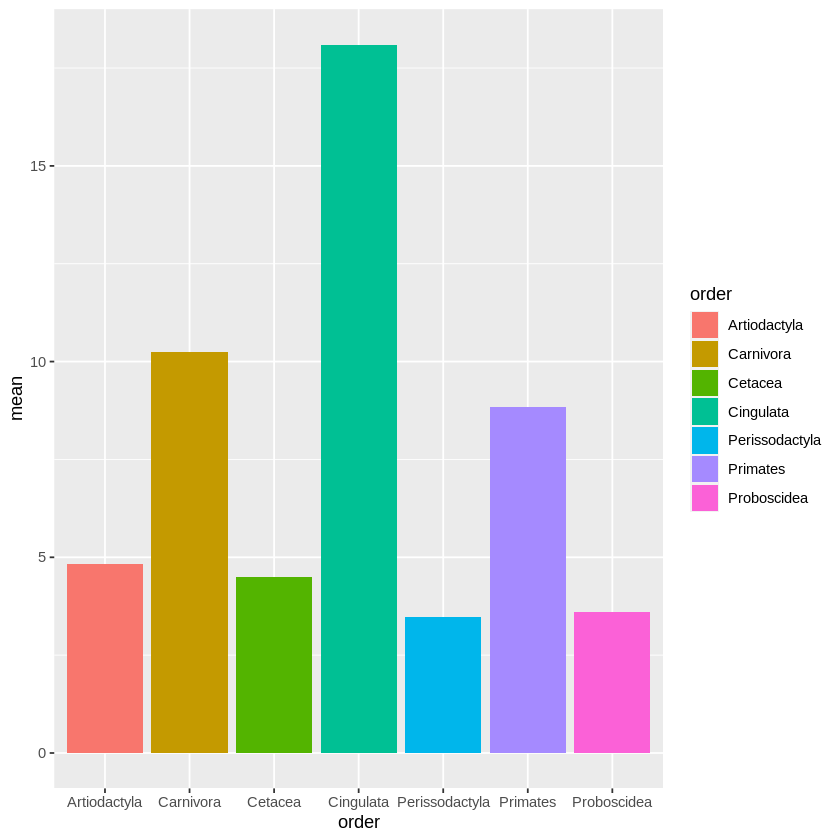

In [135]:
ggplot(final_msleep, aes(x = order, y = mean, fill = order)) + geom_bar(position = "dodge", stat = "summary", fun = "mean")

## 3. Clean and Analyze Data Using R (4 pts)

In the cells below use R to perform the following data cleaning steps on this file:
https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv

1. Remove any duplicate rows.
2. Remove any records where `last_login` or `birthdate` are empty.
3. Display only the records with the 10 highest `follower` counts.
4. Determine counts of users when grouped by continent.

In [76]:
df <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv")
head(df)

,username,full_name,birthdate,email,continent,followers,last_login,interests
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,ckippen0,Clevey Kippen,5/1/1991,ckippen0@t-online.de,NA,12362,5/16/2023,music
2,tgergler1,Tedi Gergler,10/5/1998,tgergler1@salon.com,NA,21360,8/20/2020,sports
3,spomfrett2,Steffie Pomfrett,,spomfrett2@imdb.com,NA,19530,11/19/2022,sports
4,rphettis3,Ruddy Phettis,6/18/1984,rphettis3@npr.org,EU,80047,9/20/2023,travel
5,ngilcriest4,Nico Gilcriest,10/11/1993,ngilcriest4@dyndns.org,NA,33544,,music
6,fhampson5,Farrell Hampson,11/7/1985,fhampson5@lulu.com,OC,72161,,sports


In [77]:
# remove any duplicate rows

df2 <- df[!duplicated(df), ]

In [78]:
# remove any records where last_login or birthdate are empty

df2[df2==""] <- NA

install.packages("tidyverse")
library(tidyverse)

df3 <- df2 %>% drop_na("last_login")
df3 <- df2 %>% drop_na("birthdate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [79]:
# display only the records with the ten highest follower accounts

df3 <- df3[order(df3$followers, decreasing = TRUE), ]
head(df3, 10)

,username,full_name,birthdate,email,continent,followers,last_login,interests
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
345,lleckeyb6,Lynne Leckey,4/19/1998,lleckeyb6@tripadvisor.com,SA,99977,3/14/2021,sports
309,spharoaha2,Staci Pharoah,9/2/1985,spharoaha2@sfgate.com,NA,99905,10/26/2023,sports
810,dpagettqf,Des Pagett,4/1/1992,dpagettqf@360.cn,NA,99854,NA,music
434,cduftondy,Celisse Dufton,8/24/1995,cduftondy@ox.ac.uk,OC,99707,9/26/2021,sports
222,dbartalin77,Desiree Bartalin,8/23/1993,dbartalin77@usda.gov,AF,99618,5/30/2022,music
695,grivardmp,Gwen Rivard,9/12/1982,grivardmp@google.com.hk,OC,99526,4/4/2020,music
289,mraggitt9g,Morgan Raggitt,11/16/1992,mraggitt9g@home.pl,NA,99508,11/12/2021,music
113,vshallcrass3p,Vally Shallcrass,9/26/2002,vshallcrass3p@pagesperso-orange.fr,NA,99419,NA,music
441,wbenese7,Wain Benes,3/9/1998,wbenese7@ebay.com,NA,99400,10/1/2021,travel


In [86]:
# determine counts of users when grouped by continent

group_count <- df %>% count(continent)
group_count

continent,n
<chr>,<int>
AF,127
AN,1
AS,260
EU,172
OC,187
SA,107
NA,464
